![](./lab%20header%20image.png)

<div style="text-align: center;">
    <h3>Experiment No. 05</h3>
</div>

<img src="./Student%20Information.png" style="width: 100%;" alt="Student Information">

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>AIM</strong>
</div>

**Case study on NLP in web mining and text mining**

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>Theory/Procedure/Algorithm</strong>
</div>

1. **Web Mining and Text Mining**:
- **Web mining** involves the process of extracting useful information from the content, structure, and usage of web data. It is divided into three categories:
    - `Web content mining`: Extracting and processing unstructured or semi-structured data (text, images, videos).
    - `Web structure mining`: Analyzing the structure of hyperlinks within the web.
    - `Web usage mining`: Mining usage patterns from web data like logs.
- **Text mining**, on the other hand, refers to the process of extracting meaningful information from unstructured text sources. Text mining uses machine learning algorithms, statistical models, and NLP techniques to discover hidden patterns and insights from large textual datasets.

2. **Natural Language Processing (NLP)**:
NLP is a subfield of artificial intelligence (AI) focused on the interaction between computers and humans through natural language. NLP encompasses a variety of tasks, including:

- `Tokenization`: Breaking down text into smaller units, like words or phrases.
- `Named Entity Recognition (NER)`: Identifying entities like names, locations, dates, etc.
- `Sentiment Analysis`: Determining the sentiment expressed in a piece of text (e.g., positive, negative, or neutral).
- `Topic Modeling`: Identifying topics or themes in a collection of documents.
- `Part-of-Speech (POS) Tagging`: Assigning word classes (nouns, verbs, etc.) to each token in a sentence.

3. **Applications of NLP in Web Mining and Text Mining**:
- `Sentiment Analysis`: NLP models can analyze user reviews or social media data to determine public opinion on products, events, or policies.
- `Entity Extraction`: Information extraction from web pages or social media to identify key entities like people, organizations, or places.
- `Topic Modeling`: Useful for clustering news articles, blogs, or research papers into different themes or topics.
- `Search Engine Optimization (SEO)`: Web mining techniques can be used to analyze search engine patterns to optimize content for better rankings.

**Procedure**:

1. **Data Collection**:
    - Scrape text data from websites (e.g., news sites or product reviews) using Python libraries like `BeautifulSoup` or `Scrapy`.

2. **Data Preprocessing**:
    - Clean the text by removing stop words, punctuation, and unnecessary symbols.
    - Convert the text into lowercase and apply stemming or lemmatization.
  
3. **NLP Tasks**:
    - Sentiment Analysis: Use pre-trained models like `VADER` or `TextBlob` to analyze the sentiment of the text.
    - Named Entity Recognition (NER): Apply an NER model like `spaCy` to identify entities in the text.
    - Topic Modeling: Implement `Latent Dirichlet Allocation (LDA)` to identify hidden topics within the data.
  
4. **Result Interpretation**:
    - Visualize the results using graphs like bar charts for sentiment distribution, word clouds for topic modeling, etc.
    - Analyze the effectiveness of the NLP techniques used for mining the web and extracting valuable insights.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kamran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kamran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Named Entities:
tecno zero: PERSON
tecno pova: PERSON
tecno spark: PERSON
samsung: ORG

Sentiment Score: 0.22142857142857145

Topics:
Topic 0: 0.015*"news" + 0.015*"desk" + 0.015*"toi" + 0.015*"pro"
Topic 1: 0.015*"pro" + 0.015*"news" + 0.015*"desk" + 0.015*"tecno"
Topic 2: 0.015*"pro" + 0.015*"news" + 0.015*"tech" + 0.015*"desk"
Topic 3: 0.033*"tecno" + 0.033*"desk" + 0.033*"toi" + 0.033*"tech"
Topic 4: 0.015*"tech" + 0.015*"toi" + 0.015*"news" + 0.015*"tecno"


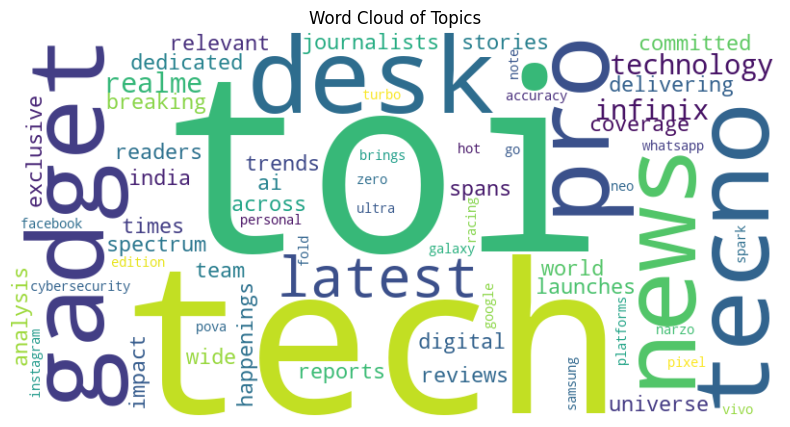

In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Web Scraping
def scrape_website(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        text = ' '.join([p.get_text() for p in soup.find_all('p')])
        return text
    except requests.RequestException as e:
        print(f"Error scraping website: {e}")
        return ""

url = 'https://timesofindia.indiatimes.com/technology/tech-news/why-and-how-qualcomms-plan-to-buy-intel-may-backfire/articleshow/113606055.cms'
text_data = scrape_website(url)

if not text_data:
    print("No text data retrieved. Exiting.")
    exit()

# Step 2: Text Preprocessing
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text_data.lower())
cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Step 3: Named Entity Recognition (NER)
try:
    nlp = spacy.load("en_core_web_sm")
except IOError:
    print("Downloading spaCy model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

doc = nlp(' '.join(cleaned_tokens))
print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

# Step 4: Sentiment Analysis
blob = TextBlob(' '.join(cleaned_tokens))
print(f"\nSentiment Score: {blob.sentiment.polarity}")

# Step 5: Topic Modeling (LDA)
dictionary = corpora.Dictionary([cleaned_tokens])
corpus = [dictionary.doc2bow(cleaned_tokens)]
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("\nTopics:")
topics = lda_model.print_topics(num_words=4)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

# Visualization: Word Cloud of Topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Topics")
plt.show()

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>CONCLUSION</strong>
</div>

In this experiment, we successfully applied NLP techniques such as sentiment analysis, named entity recognition, and topic modeling on text data collected from the web. The results demonstrate the effectiveness of these techniques in extracting meaningful insights from unstructured textual data. Sentiment analysis provided a clear understanding of the public's emotions, while NER helped in identifying important entities. Topic modeling revealed the underlying themes in the text data. This case study illustrates how NLP can significantly improve decision-making processes by analyzing large volumes of text in an automated, efficient, and scalable manner.

<div style="border: 1px solid #ccc; padding: 8px; background-color: #f0f0f0; text-align: center;">
    <strong>ASSESSMENT</strong>
</div>

<img src="./marks_distribution.png" style="width: 100%;" alt="marks_distribution">